# Explore here

## Step 1: Problem statement and data collection

Problem statement: classify houses according to their region and median income.

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [37]:
# Import dataset to start working with it
import pandas as pd

raw_data = pd.read_csv("../data/raw/housing.csv", sep=",")
raw_data.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [38]:
# We do not care about columns other than Latitude, Longitude, or Median Income for this problem statement
raw_data = raw_data[["MedInc", "Latitude", "Longitude"]]
raw_data.drop_duplicates(inplace=True)

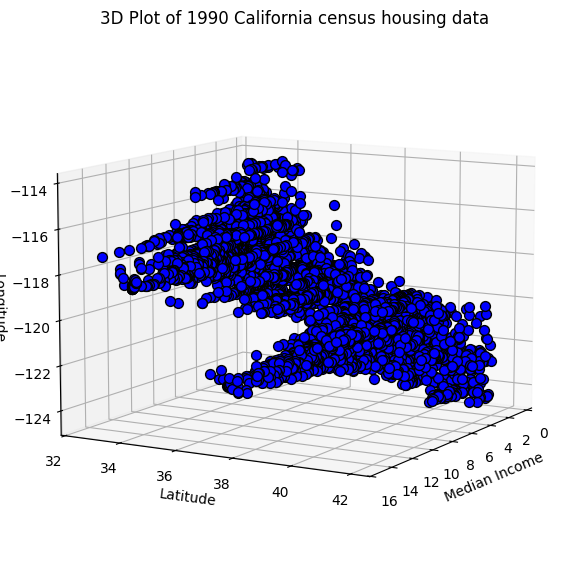

In [39]:
# Set up the 3D figure
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection="3d")

# Plot the data points
ax.scatter(
    raw_data["MedInc"],
    raw_data["Latitude"],
    raw_data["Longitude"],
    marker="o",
    edgecolor="k",
    s=50,
    c="b",
    depthshade=False,
)

# Set plot titles and labels
ax.set_title("3D Plot of 1990 California census housing data")
ax.set_xlabel("Median Income")
ax.set_ylabel("Latitude")
ax.set_zlabel("Longitude")

# Rotate the view 90 degrees clockwise around Z axis
ax.view_init(elev=10, azim=30)

# Show the plot
plt.show()


In [40]:
# alternate means of plotting same, using package learned about during last week's assignment:
import plotly.express as px

# --- 3‑D scatter using Plotly Express ---------------------------------
fig = px.scatter_3d(
    raw_data,
    x="MedInc",  
    y="Latitude", 
    z="Longitude",
    ## keep the single‑color aesthetic of the matplotlib version
    color_discrete_sequence=["#1f77b4"],  # Plotly’s default blue
    size_max=8,  # caps marker scaling if `size=` is ever used
    width=1280,
    height=720,
)

# Set title and axis labels
fig.update_layout(
    title="3D Plot of 1990 California census housing data",
    scene=dict(
        xaxis_title="Median Income",
        yaxis_title="Latitude",
        zaxis_title="Longitude",
    ),
)

# define a starting camera angle similar-ish to non-rotatable plot
camera = dict(up=dict(x=0, y=0, z=1), eye=dict(x=1.75, y=1.75, z=0.6))
fig.update_layout(scene_camera=camera)

fig.show()

In [41]:
from sklearn.model_selection import train_test_split

feature_cols = ["MedInc", "Latitude", "Longitude"]

X_train, X_test = train_test_split(
    raw_data[feature_cols],
    test_size=0.20,
    random_state=42,
    shuffle=True,
)

kmeans = KMeans(n_clusters=6, random_state=42, n_init="auto")
train_labels = kmeans.fit_predict(X_train)  # centroids learned here
test_labels = kmeans.predict(X_test)  # nearest‑centroid assignment

In [42]:
train_plot = X_train.copy()
train_plot["Cluster"] = train_labels

test_plot = X_test.copy()
test_plot["Cluster"] = test_labels


In [43]:
fig_test = px.scatter_3d(
    train_plot,
    x="MedInc",
    y="Latitude",
    z="Longitude",
    color="Cluster",
    color_continuous_scale=px.colors.sequential.Viridis,
    opacity=0.90,
    width=1280,
    height=720,
)
fig_test.update_layout(
    title="K‑Means – TRAIN set (predicted clusters)",
    scene_camera=dict(up=dict(x=0, y=0, z=1), eye=dict(x=1.6, y=1.6, z=0.5)),
)
fig_test.show()


Below cells will recolor those in grey and then overlay the test set as colored dots over/among that

In [44]:
import plotly.graph_objects as go

fig_overlay = go.Figure()

# light‑grey train points (context only)
fig_overlay.add_trace(
    go.Scatter3d(
        x=train_plot["MedInc"],
        y=train_plot["Latitude"],
        z=train_plot["Longitude"],
        mode="markers",
        marker=dict(
            size=4,
            color="lightgrey",
            opacity=0.2,
            line=dict(
                color="black",  # edge color
                width=1,  # edge thickness
            ),
        ),
        name="Train (fitted)",
        hoverinfo="skip",
    )
)


In [45]:
# coloured test points
fig_overlay.add_trace(
    go.Scatter3d(
        x=test_plot["MedInc"],
        y=test_plot["Latitude"],
        z=test_plot["Longitude"],
        mode="markers",
        marker=dict(
            size=6,
            color=test_plot["Cluster"],
            colorscale="Viridis",
            colorbar=dict(title="Cluster"),
            opacity=0.90,
        ),
        name="Test (predicted)",
    )
)


In [46]:
fig_overlay.update_layout(
    title="K‑Means – Training context (grey) with coloured Test clusters",
    width=1280,
    height=720,
    scene=dict(
        xaxis_title="Median Income",
        yaxis_title="Latitude",
        zaxis_title="Longitude",
    ),
    scene_camera=dict(up=dict(x=0, y=0, z=1), eye=dict(x=1.6, y=1.6, z=0.5)),
)
fig_overlay.show()


Same thing but without ability to rotate plot:

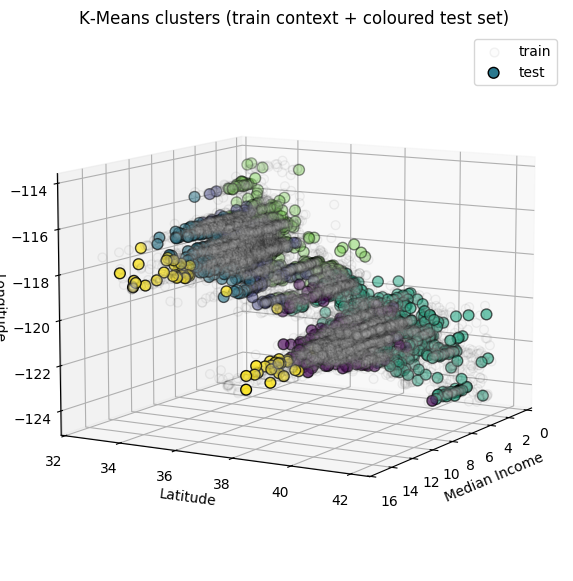

In [47]:
# Create a 3D plot for the clustered data points
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection="3d")

# training points in light‑gray for context
ax.scatter(
    train_plot["MedInc"],
    train_plot["Latitude"],
    train_plot["Longitude"],
    c="lightgray",
    alpha=0.05,
    s=40,
    edgecolor="k",
    label="train",
)

# test points coloured by predicted cluster
ax.scatter(
    test_plot["MedInc"],
    test_plot["Latitude"],
    test_plot["Longitude"],
    c=test_plot["Cluster"],
    cmap="viridis",
    s=60,
    edgecolor="k",
    label="test",
)

# Rotate the view 90 degrees clockwise around Z axis
ax.view_init(elev=10, azim=30)
ax.set_title("K‑Means clusters (train context + coloured test set)")
ax.set_xlabel("Median Income")
ax.set_ylabel("Latitude")
ax.set_zlabel("Longitude")
ax.legend()
plt.show()

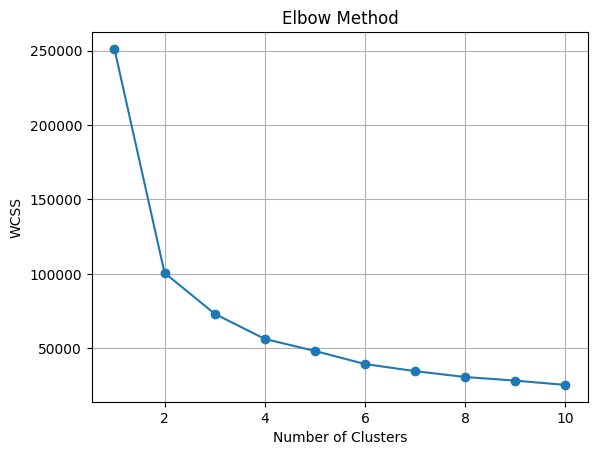

In [48]:
# Create a list to store the WCSS values for different numbers of clusters
wcss = []

# Calculate WCSS for cluster numbers ranging from 1 to 10
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(raw_data)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.plot(range(1, 11), wcss, marker="o")
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()


## Hierarchical clustering

In [49]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage


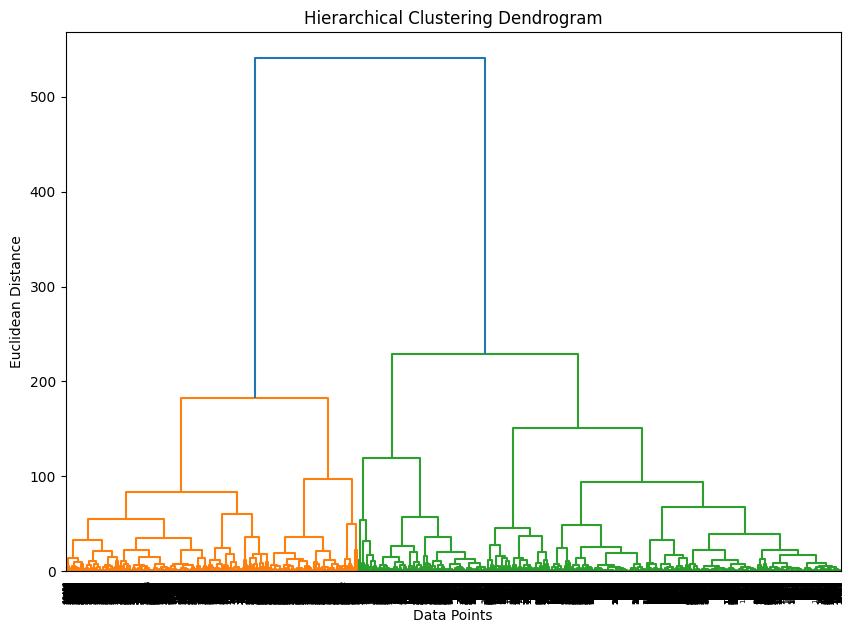

In [50]:
# Perform hierarchical clustering using the 'ward' method
Z = linkage(
    raw_data[["MedInc", "Latitude", "Longitude"]],
    method="ward",
)

# Plot the dendrogram
plt.figure(figsize=(10, 7))
plt.title("Hierarchical Clustering Dendrogram")
dendrogram(Z)
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()


## Principal Component Analysis (PCA)

       Principal Component 1  Principal Component 2
0                   3.269139               4.614854
1                   3.248696               4.590763
2                   3.298500               3.552972
3                   3.372576               1.946088
4                   3.447455               0.156477
...                      ...                    ...
20630               3.945380              -2.259825
20631               3.992847              -1.257199
20632               3.991472              -2.108218
20633               4.052569              -1.933023
20634               3.932504              -1.419239

[20635 rows x 2 columns]


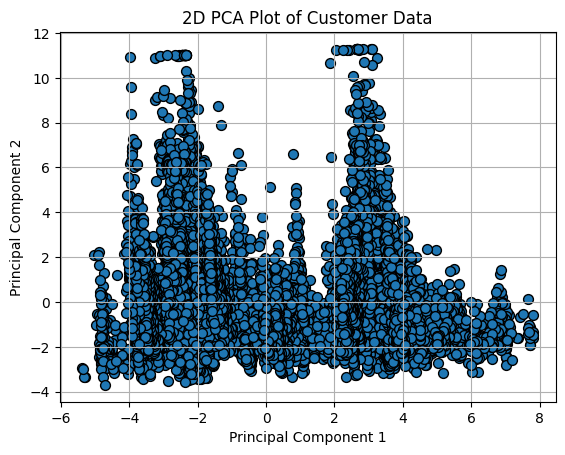

In [51]:
from sklearn.decomposition import PCA

# Apply PCA to reduce the dimensions of the customer data to 2 dimensions
pca = PCA(n_components=2)
pca_result = pca.fit_transform(raw_data)

# Create a DataFrame with the 2 principal components
pca_df = pd.DataFrame(
    pca_result, columns=["Principal Component 1", "Principal Component 2"]
)

# Display the resulting DataFrame
print(pca_df)

# Plot the 2D data points after PCA
plt.scatter(
    pca_df["Principal Component 1"],
    pca_df["Principal Component 2"],
    marker="o",
    edgecolor="k",
    s=50,
)
plt.title("2D PCA Plot of Customer Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()


## Training a supervised model based on these cluster labels

In [52]:
# wrap predicted labels into Series so indices line up with X_
y_train = pd.Series(train_labels, index=X_train.index, name="Cluster")
y_test = pd.Series(test_labels, index=X_test.index, name="Cluster")

In [53]:
from xgboost import XGBClassifier

classifier = XGBClassifier(
    objective="multi:softmax",  # gives discrete classes 0‑5
    num_class=6,
    random_state=42,
)
classifier.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_class=6, ...)

In [54]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = classifier.predict(X_test)
y_pred

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9946692512721105
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       587
           1       1.00      1.00      1.00       995
           2       0.99      1.00      0.99       317
           3       1.00      0.99      0.99      1082
           4       1.00      1.00      1.00      1095
           5       0.96      0.92      0.94        51

    accuracy                           0.99      4127
   macro avg       0.99      0.98      0.99      4127
weighted avg       0.99      0.99      0.99      4127

